# Ödev 1 
Aşağıda verilen soruları gerçekleştirin.
Veri seti : https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

a) Yaşam alanı (sqft_living) ve arsa (sqft_lot) özniteliklerini (feature, attribute) kullanarak evin fiyatını tahmin edecek basit bir regresyon modeli geliştiriniz.

b) Veri setindeki bütün öznitelikleri kullanarak çok değişkenli bir regresyon modeli ile evin fiyatını tahmin ediniz.

Bu iki modeli karşılaştırarak sonuçlarını tartışınız. 

  **Not: Regresyon modeli için hazır kütüphane kullanmayınız. Algoritmayı 
kendiniz kodlayınız.**

## Soru 1 

---

Bu soru 3 aşamadan oluşmakta. 

1.   Verileri Hazırlama
2.   Gerekli Fonksiyonların Yazımı ve Eğitim
3.   Sonuçların değerlendirilmesi





İlk olarak gerekli kütüphaneleri import edelim

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Şimdi veri dosyamızı okuyalım ve sırasıyla verilerimizi inceleyelim. Bilgilerine bakalım

### 1.Veri Hazırlama

Bu bölümde veriler düzgün formatta hazırlanır ve görselleştirilir. 

In [2]:
data_frame = pd.read_csv("kc_house_data.csv")
print(data_frame.shape)
data_frame.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Null verimiz olmadığına göre artık verilerimiz üzerinde işlemler yapmaya başlayabiliriz. 

İlk olarak parametre ile sonuç arasındaki ilişkileri grafiğe dökelim.

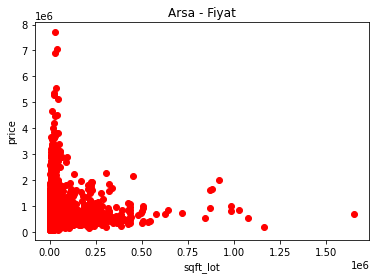

In [4]:
plt.scatter(x = data_frame[['sqft_lot']] , y=data_frame[["price"]] , color="red")  
 
# tanım
plt.xlabel("sqft_lot")
plt.ylabel("price")
plt.title("Arsa - Fiyat")
plt.show()


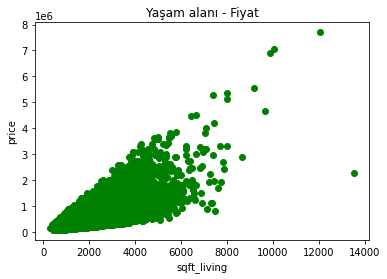

In [5]:
plt.scatter(x = data_frame['sqft_living'] , y=data_frame["price"] , color="green")       
# tanım
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("Yaşam alanı - Fiyat")
plt.show()

Şimdi verilerimizi train ve test olarak ayırıyoruz. Oran olarak %70 tercih edildi.

In [13]:
from sklearn.model_selection import train_test_split


X = data_frame[['sqft_living','sqft_lot']]
Y = data_frame[["price"]]
x_train, x_test, y_train, y_test =  train_test_split(X,Y,train_size=0.8) # %80 ini test için ayır.

print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


Verilerimizi sayı değerleri çok yüksek olduğu için bunların eğitilmesi çok uzun sürecektir. 

Bu yüzden her x değerlerinr MinMaxNormalizasyon uyguluyoruz. Bu şekilde verilerimiz 0 - 1 arasına indirgenmiş olacak ve daha hızlı eğitilecekler

In [14]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
scaler.fit(x_train) 
# x train scale edilecek. Bu yüzden uygun hale getirildi.

x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test) 


print(type(y_train)) # pandas tipi
type(x_train)        # numpy tipi 


<class 'pandas.core.frame.DataFrame'>


numpy.ndarray

Artık verilerle işimiz tamamlandı. Verileri eğitmek için gerekli olan fonksiyonları yazma aşamasına geçebiliriz.

### 2. Gerekli Fonksiyonların Yazımı

Bu bölümde 
* J maliyet fonksiyonu , 
* Gradient Descent algoritmasını uygulayan fonksiyon ve 
* Gradient Descent içerisinde maliyetin türevinin alındığı J_derivate fonksiyonları 

bulunmaktadır.


In [16]:
def J(X, Y, Q0, Q1, Q2 ):
    """ VERİLEN Q DEĞERLERİ İÇİN TÜM TABLOYU DENER VE GERÇEK Y İLE FARKIN KARELERİNİ TOPLAR. BÖYLECE MALİYETİ ÖLÇER """
    # X : x_test.values
        # X[i][0] : sqft_living  
        # X[i][1] : sqft_lot 

    # Y : y_test.values
    # hx = Q0 + Q1*x1 + Q2x2   
    
    total = 0
    m = len(X)
    for i in range(m):
        total = total + ( Q0 + Q1*X[i][0] + Q2*X[i][1] - Y[i][0])**2
    return 1/(2*m) * total 

    
    
def J_derivate(X, Y, Q0=1, Q1=1, Q2=1, k=1 ):
    """GRADİENT D. ALGORİTMASI İÇİN MALİYETİN, TÜREVİNİN ALINDIKTAN SONRA, HESAPLANDIĞI KISIM"""
    # X : x_test.values
        # X[i][0] : sqft_living  
        # X[i][1] : sqft_lot 

    # Y : y_test.values
    # hx = Q0 + Q1*x1 + Q2x2  
    total = 0
    result = 0
    m = len(X)
    if(k==0):
        for i in range(m):
            
            total = total + (  Q0 + Q1*X[i][0] + Q2*X[i][1] - Y[i][0] )
    else:
        for i in range(m):
            
            total = total + ( Q0 + Q1*X[i][0] + Q2*X[i][1] - Y[i][0] )*X[i][k-1]

    result = (1/m) * total 
    return result 

Başlangıç için Q değerlerini 1,1,1 seçebiliriz. Fakat bu sayılar optimum değerlere doğru değişeceği için doğru seçim yapmak önemlidir. 

In [17]:
Q    = [1,1,1]
# maliyetlerimizi bir listede tutalım
cost = []
Q

[1, 1, 1]

Maliyet[0] =  210052989100.04086
Q :  [1625.053761397895, 274.46711447538854, 18.137288522602848]


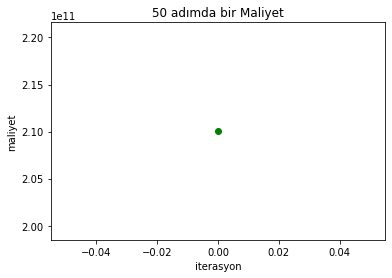

Maliyet[50] =  171536545520.9359
Q :  [76779.41494470647, 13124.47096833583, 820.73967556512]


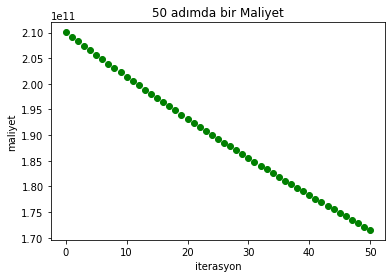

Maliyet[100] =  143220813154.3713
Q :  [141221.48703282376, 24516.042301067195, 1527.22456667685]


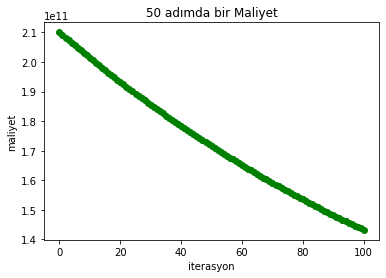

Maliyet[150] =  122408319679.98096
Q :  [196471.11462237363, 34655.836477479344, 2151.20973752372]


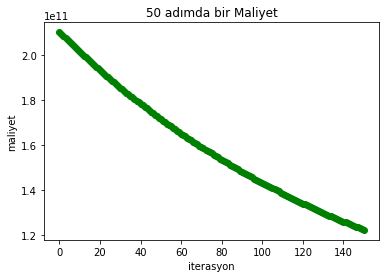

Maliyet[200] =  107113895041.40453
Q :  [243832.51390150728, 43721.18975980762, 2704.380952108153]


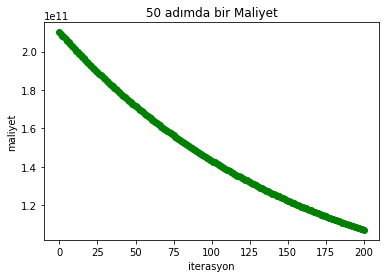

Maliyet[250] =  95876723670.62445
Q :  [284424.86499151064, 51864.27896357048, 3196.7660674614626]


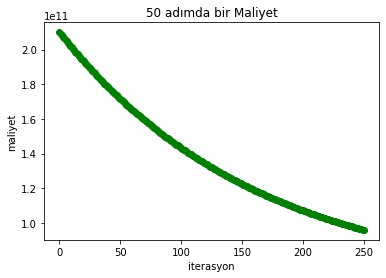

Maliyet[300] =  87621967960.85846
Q :  [319208.5639912725, 59215.69096107331, 3636.970249655303]


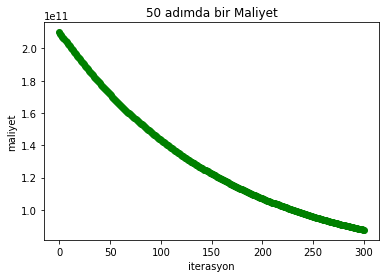

Maliyet[350] =  81558891490.18916
Q :  [349007.7505055001, 65887.48576059041, 4032.377818474822]


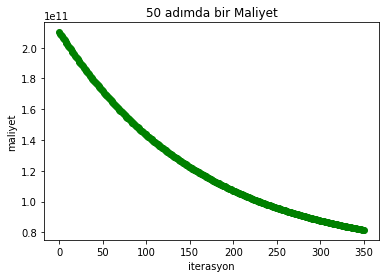

Maliyet[400] =  77105856919.89525
Q :  [374529.63907348306, 71975.82501031982, 4389.325455321564]


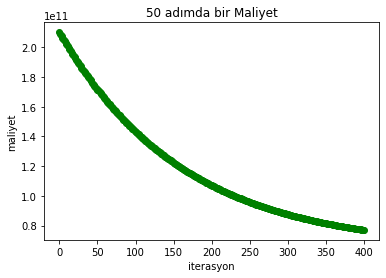

Maliyet[450] =  73835111291.33563
Q :  [396381.1079459187, 77563.22758259434, 4713.250837196083]


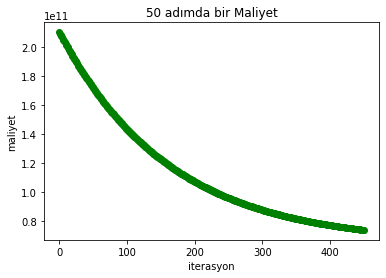

Maliyet[500] =  71432140165.7625
Q :  [415082.9343243227, 82720.50514644322, 5008.820183192094]


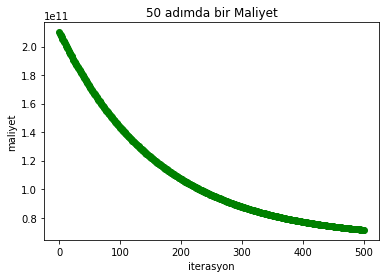

Maliyet[550] =  69665748085.1178
Q :  [431082.0099718132, 87508.42313024774, 5280.037705295646]


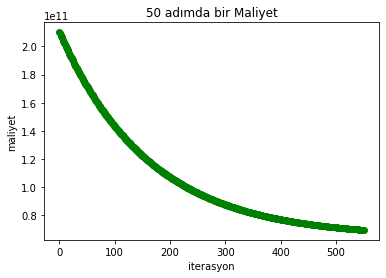

Maliyet[600] =  68366036069.04447
Q :  [444761.8237306489, 91979.12603484947, 5530.339530821122]


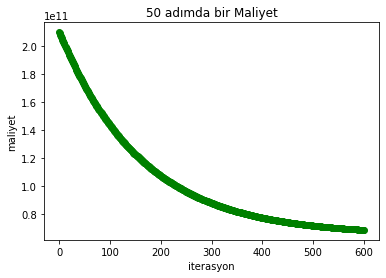

Maliyet[650] =  67408192951.36455
Q :  [456451.4568296213, 96177.36052995732, 5762.674299574999]


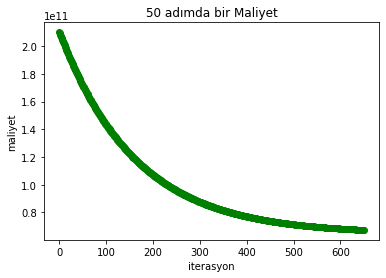

Maliyet[700] =  66700566729.882545
Q :  [466433.3019796598, 100141.52502340474, 5979.572326274188]


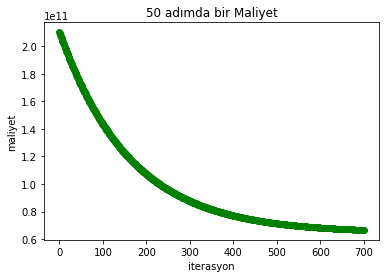

Maliyet[750] =  66175886620.208046
Q :  [474949.68732055963, 103904.57032247137, 6183.204950526627]


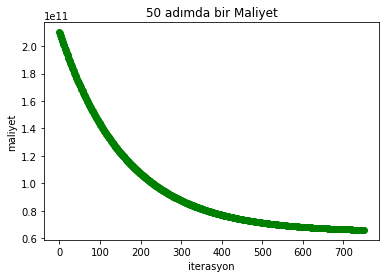

Maliyet[800] =  65784804357.85573
Q :  [482208.5605933877, 107494.77251362441, 6375.435466516586]


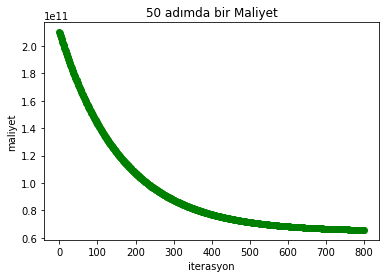

Maliyet[850] =  65491142605.42348
Q :  [488388.3668693192, 110936.3961897276, 6557.862827026425]


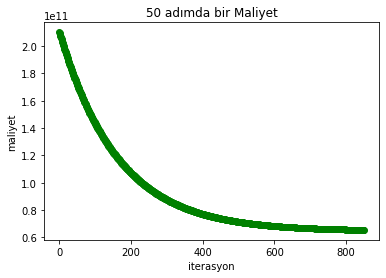

Maliyet[900] =  65268399801.1105
Q :  [493642.23424931086, 114250.26358170195, 6731.859146937889]


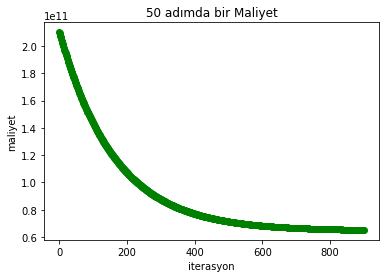

Maliyet[950] =  65097179679.83541
Q :  [498101.56571644713, 117454.2429444707, 6898.601885913516]


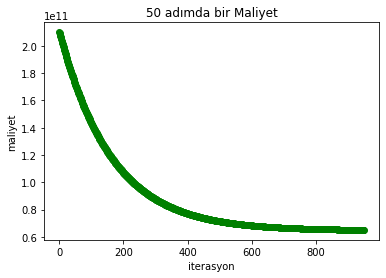

Maliyet[1000] =  64963301237.04571
Q :  [501879.1213932159, 120563.66765301026, 7059.101465151023]


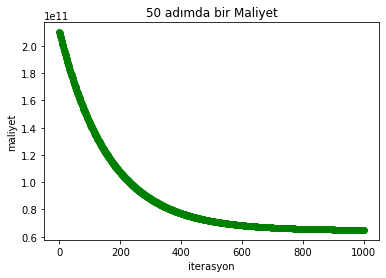

Maliyet[1050] =  64856409355.976105
Q :  [505071.6635026594, 123591.69583903004, 7214.2249660028265]


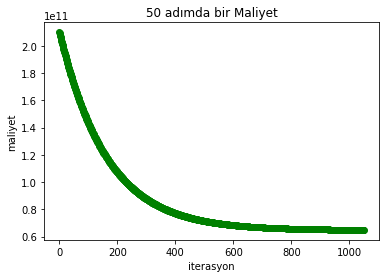

Maliyet[1100] =  64768953769.74204
Q :  [507762.2260749118, 126549.61900409636, 7364.716466347198]


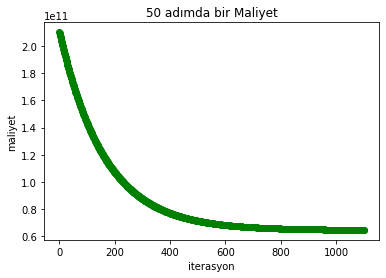

Maliyet[1150] =  64695438963.15508
Q :  [510022.0626384786, 129447.12684818207, 7511.214491731034]


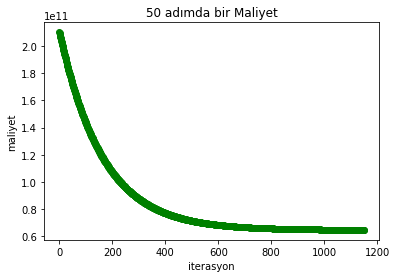

Maliyet[1200] =  64631873336.469734
Q :  [511912.317582263, 132292.5345255907, 7654.266990626765]


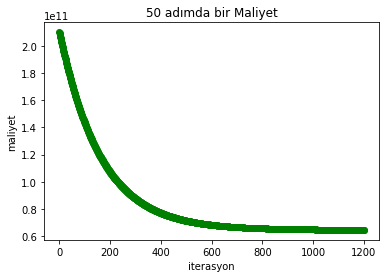

Maliyet[1250] =  64575364884.99768
Q :  [513485.4603926312, 135092.97765888227, 7794.344185070484]


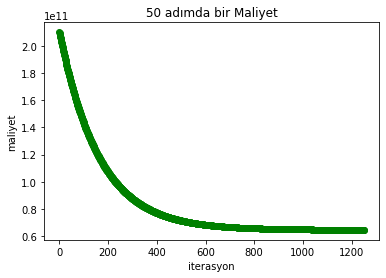

Maliyet[1300] =  64523824584.30979
Q :  [514786.51640768745, 137854.5796851426, 7931.849598112141]


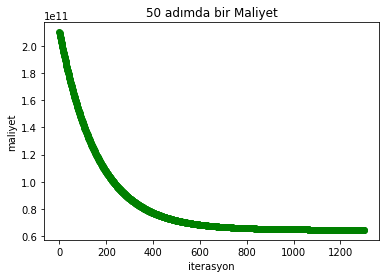

Maliyet[1350] =  64475748928.39281
Q :  [515854.1229579372, 140582.59545995388, 8067.129516743122]


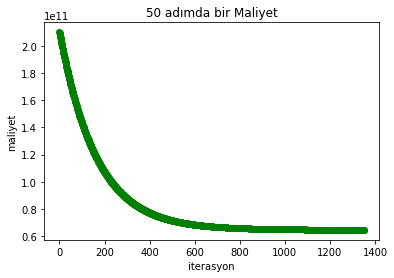

Maliyet[1400] =  64430060617.86043
Q :  [516721.4356666934, 143281.53448751106, 8200.481112268293]


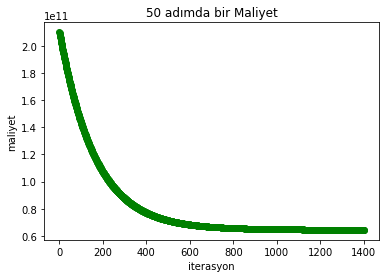

Maliyet[1450] =  64385991951.56325
Q :  [517416.9061688586, 145955.2666674305, 8332.15940859799]


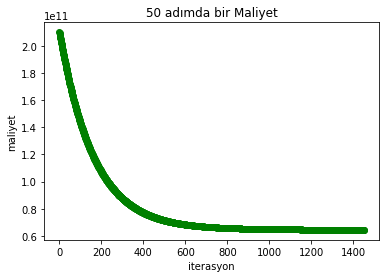

Maliyet[1500] =  64342999563.674934
Q :  [517964.9494906302, 148607.11303870074, 8462.383261911602]


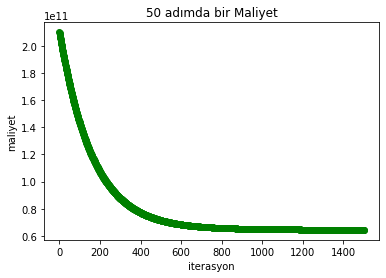

Maliyet[1550] =  64300702156.80553
Q :  [518386.5167445236, 151239.9236493088, 8591.340491954656]


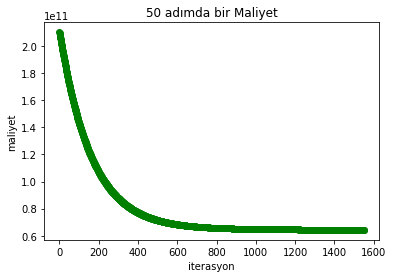

Maliyet[1600] =  64258835095.05862
Q :  [518699.5865731257, 153856.14437809188, 8719.192285331757]


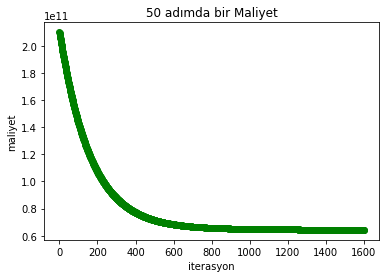

Maliyet[1650] =  64217217349.03877
Q :  [518919.5868691267, 156457.87427622013, 8846.076974081036]


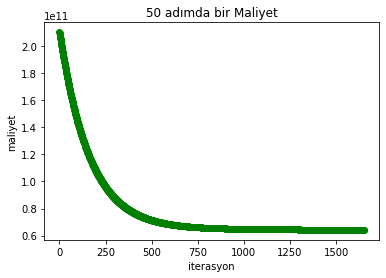

Maliyet[1700] =  64175727482.25742
Q :  [519059.75666370266, 159046.91477333996, 8972.113278162326]


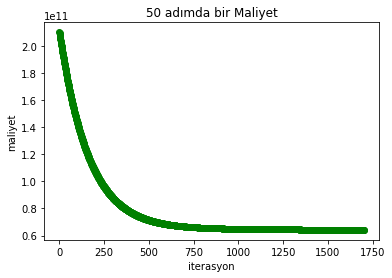

Maliyet[1750] =  64134286248.83294
Q :  [519131.45667188085, 161624.8119025819, 9097.403087916375]


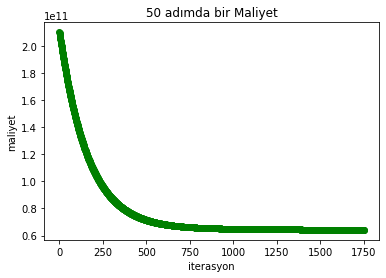

Maliyet[1800] =  64092844019.64895
Q :  [519144.43577919446, 164192.89253488404, 9222.033851761918]


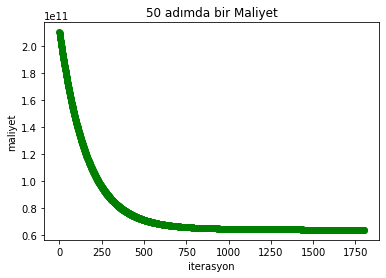

Maliyet[1850] =  64051371729.80828
Q :  [519107.0597204658, 166752.29547255972, 9346.080625137532]


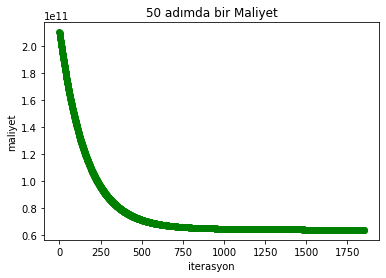

Maliyet[1900] =  64009854389.699974
Q :  [519026.5073147246, 169303.99813145815, 9469.607828749287]


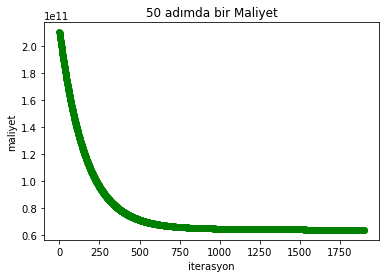

Maliyet[1950] =  63968286458.64381
Q :  [518908.93885923875, 171848.83943758463, 9592.670757366544]


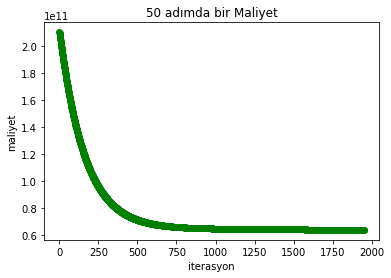

Maliyet[2000] =  63926668568.46991
Q :  [518759.6406325968, 174387.5394752566, 9715.316874556911]


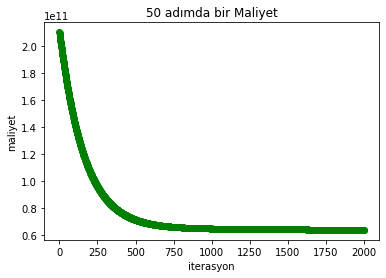

Maliyet[2050] =  63885005222.61607
Q :  [518583.148896374, 176920.71634767263, 9837.586923730323]


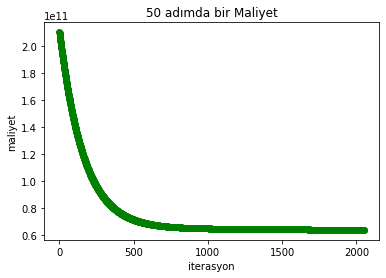

Maliyet[2100] =  63843303197.66937
Q :  [518383.3563040245, 179448.90064538328, 9959.515881553416]


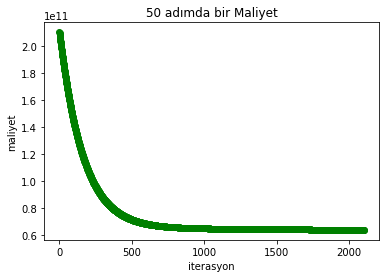

Maliyet[2150] =  63801570448.525536
Q :  [518163.60321298655, 181972.54786204317, 10081.133776098033]


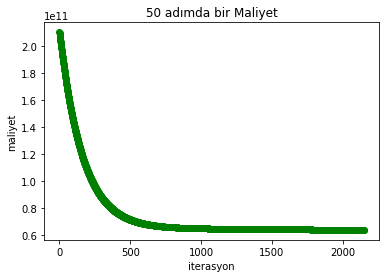

Maliyet[2200] =  63759815372.70298
Q :  [517926.75604185124, 184492.04904867546, 10202.466388914587]


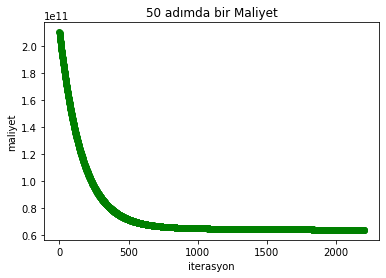

Maliyet[2250] =  63718046329.08964
Q :  [517675.2745105902, 187007.73995635918, 10323.535857498679]


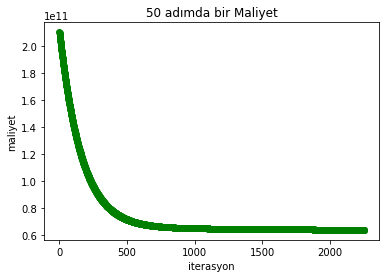

Maliyet[2300] =  63676271335.44553
Q :  [517411.26934105426, 189519.90888179562, 10444.361192282511]


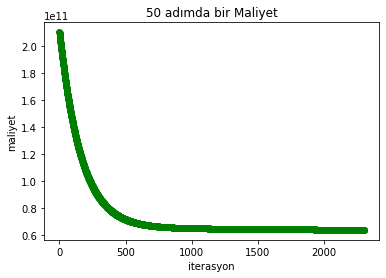

Maliyet[2350] =  63634497890.148674
Q :  [517136.5517711989, 192028.8033997826, 10564.958720278093]


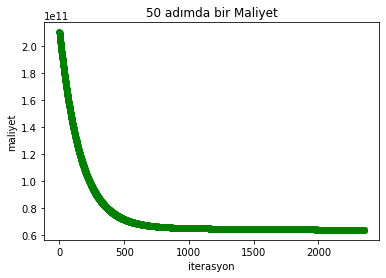

Maliyet[2400] =  63592732879.10203
Q :  [516852.6760444645, 194534.63614051713, 10685.34246577834]


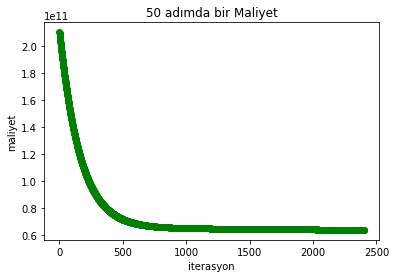

Maliyet[2450] =  63550982539.91664
Q :  [516560.9758709632, 197037.58974724213, 10805.524477046209]


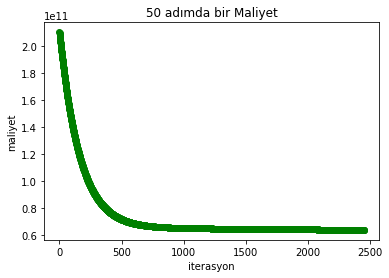

Maliyet[2500] =  63509252463.616974
Q :  [516262.59571572504, 199537.82113052486, 10925.515106654673]


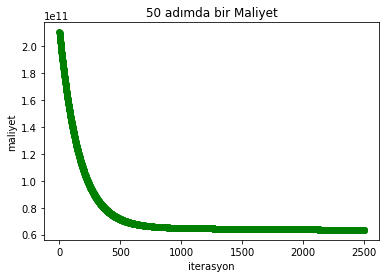

Maliyet[2550] =  63467547619.97743
Q :  [515958.5176479156, 202035.46511895955, 11045.323252053387]


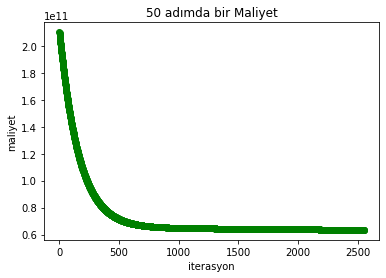

Maliyet[2600] =  63425872396.834114
Q :  [515649.5843808129, 204530.63759192466, 11164.956562004918]


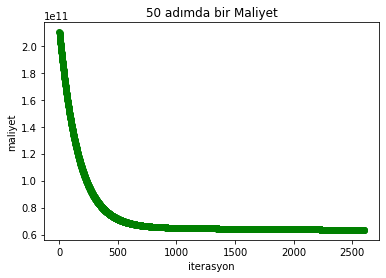

Maliyet[2650] =  63384230646.75136
Q :  [515336.5190429798, 207023.43816788035, 11284.421613732762]


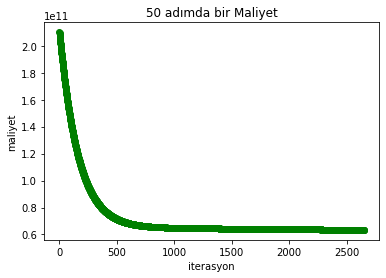

Maliyet[2700] =  63342625736.57943
Q :  [515019.94214439864, 209513.95251126194, 11403.72406493646]


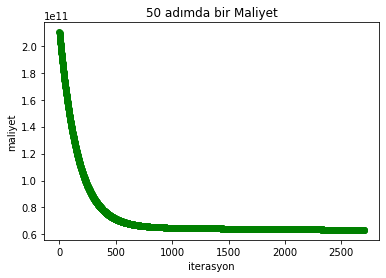

Maliyet[2750] =  63301060596.97963
Q :  [514700.3861355278, 212002.25431208368, 11522.868784239527]


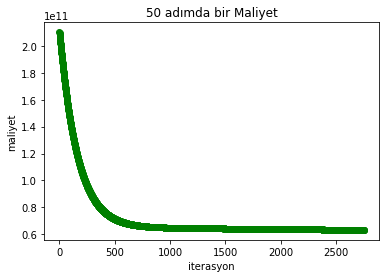

Maliyet[2800] =  63259537770.07285
Q :  [514378.3079007897, 214488.40698468446, 11641.859963130055]


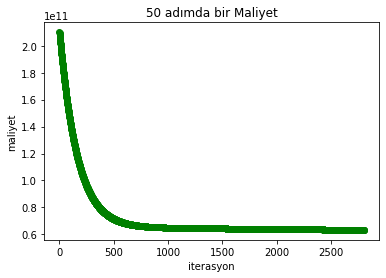

Maliyet[2850] =  63218059454.11316
Q :  [514054.0994795404, 216972.46512546437, 11760.701212019718]


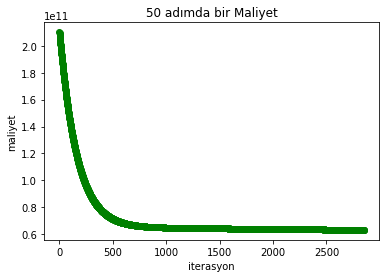

Maliyet[2900] =  63176627544.60891
Q :  [513728.0972660006, 219454.47576380425, 11879.395642674359]


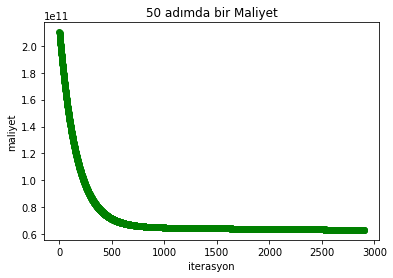

Maliyet[2950] =  63135243671.65327
Q :  [513400.58990394033, 221934.47943551102, 11997.945938949775]


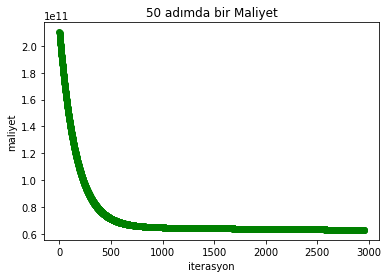

Maliyet[3000] =  63093909233.46621
Q :  [513071.82506130723, 224412.5111039674, 12116.354417491792]


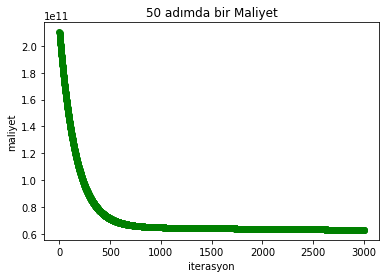

In [18]:
def GradientDescent(Q, X , Y , alfa=0.1, epoch=10000):
    # epoch sayısı kadar tablomuzu tekrar tekrar gezip, modelimizi eğiteceğiz.
    for i in range(epoch+1):
        # Her döngüde geçici olarak maliyeti hesaplayalım ve bu değeri cost listemize atalım
        tempCost = J(X=x_test, Y=y_test.values, Q0=Q[0], Q1=Q[1], Q2=Q[2])
        cost.append(tempCost) 

        # Paramtere hesaplama kısmı 
        q0 = Q[0] - alfa * J_derivate(X=X, Y=Y, Q0=Q[0], Q1=Q[1], Q2=Q[2], k=0)
        q1 = Q[1] - alfa * J_derivate(X=X, Y=Y, Q0=Q[0], Q1=Q[1], Q2=Q[2], k=1)
        q2 = Q[2] - alfa * J_derivate(X=X, Y=Y, Q0=Q[0], Q1=Q[1], Q2=Q[2], k=2)
        
        # Paramterlerin eşzamanlı güncellenmesi
        Q[0] = q0
        Q[1] = q1
        Q[2] = q2

        # her 50 adımda maliyetin yazılması ve tablo çizilmesi 
        if i % 50 == 0:
            print(f"Maliyet[{i}] = ",cost[i] )
            print(f"Q : ",Q)
            plt.scatter(x = range(len(cost)) ,y = cost, color="green")       
            # tanım
            plt.xlabel("iterasyon")
            plt.ylabel("maliyet")
            plt.title("50 adımda bir Maliyet")
            plt.show()    


GradientDescent(Q=Q, X=x_train , Y=y_train.values, alfa=0.003 , epoch=3000)

In [19]:
print(f"Q değerleri {Q}")


Q değerleri [513071.82506130723, 224412.5111039674, 12116.354417491792]


### 3. Sonuçların Değerlendirilmesi 

Bu bölümde eğitirken gördüğümüz maliyet fonksiyon ve grafiği dışında elimizdeki Q değerleri ile her x'e karşılık gelen y değerleri tahmin edilecek ve gerçek y ile yüzde kaç saptığı değerlendirilecektir. En sonda ortalama yüzde kaçlık hata olduğu hesaplanacaktır.

In [20]:
hatalar = []
def degerlendirme():
    for i in range(len(x_test)):
        # print(f"Q[0]={Q[0]}  Q[1]={Q[1]}  Q[2]={Q[2]}")
        gercek = y_test.values[i]
        print(f"Gerçek {i}. veri = {gercek}")

        tahmin = Q[0] + Q[1] * float(x_test[i][0]) + Q[2] * float(x_test[i][1])
        
        # print("X verileri = ", x_test[i] ) 
        print(f"Tahmin {i}. veri = {tahmin}")

        aradaki_fark = (abs(gercek - tahmin) / gercek) * 100
        # print(f" %{aradaki_fark} hata")

        hatalar.append(aradaki_fark)
    print("Ortalama hatalar oranı %", (sum(hatalar)/len(hatalar)) )
degerlendirme()

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Tahmin 1823. veri = 526985.2434847788
Gerçek 1824. veri = [568000.]
Tahmin 1824. veri = 542902.5997924414
Gerçek 1825. veri = [474900.]
Tahmin 1825. veri = 538962.9141106977
Gerçek 1826. veri = [1260500.]
Tahmin 1826. veri = 571454.9821816297
Gerçek 1827. veri = [379500.]
Tahmin 1827. veri = 536059.9099162531
Gerçek 1828. veri = [861000.]
Tahmin 1828. veri = 550866.1146853861
Gerçek 1829. veri = [2225000.]
Tahmin 1829. veri = 566711.1387624426
Gerçek 1830. veri = [712000.]
Tahmin 1830. veri = 554425.9679090357
Gerçek 1831. veri = [875000.]
Tahmin 1831. veri = 559592.2543406072
Gerçek 1832. veri = [445000.]
Tahmin 1832. veri = 528411.1600394379
Gerçek 1833. veri = [352000.]
Tahmin 1833. veri = 529210.8066349392
Gerçek 1834. veri = [260000.]
Tahmin 1834. veri = 538505.1840487693
Gerçek 1835. veri = [369000.]
Tahmin 1835. veri = 534470.8199777165
Gerçek 1836. veri = [270000.]
Tahmin 1836. veri = 531029.7360838687
Gerçek 1837. veri = [151000.]

-------------------------------------------------------------------------------

---

## Soru 2 

***b)*** Veri setindeki bütün öznitelikleri kullanarak çok değişkenli bir regresyon modeli ile evin fiyatını tahmin ediniz. 






In [ ]:
X = data_frame.drop(['id', 'date', 'price', 'yr_renovated','zipcode','lat','long'], axis=1)
Y = data_frame[['price']]

x_train, x_test, y_train, y_test =  train_test_split(X,Y,train_size=0.7) # %70 ini test için ayır.
print(len(x_train.values))

print("Kolon sayısı :",len(X.columns))


# Q_all  = [-23000,46000,320000,380000,10000,180000,230000,370000,76000,600000,410000,270000,-260000,460000,6000]
q_temp = []  # Q listesinin değişimini iterasyon sonuna kadar tutacağımız geçici liste
Q_all  = []
# başlangıç değeri için kolon sayısı + 1 adet 1 ekleyeceğim
for i in range(len(X.columns)+1):
    Q_all.append(1)
    q_temp.append(1)

print(Q_all)
x_train


In [ ]:

scaler = MinMaxScaler()
scaler.fit(x_train) 
# x train scale edilecek. Bu yüzden uygun hale getirildi.
print(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test) 


print(type(y_train)) # pandas tipi
type(x_train)        # numpy tipi 
x_train

In [ ]:
def Hq(X , Q_all:list):
    hq = 0 
    # Önce satırı al dizi olarak 
    # Satırı enumerate ile (indis,veri) olarak al
    # Q[indis] * veri
    for j, attr in enumerate(X, start=1): 
        hq = hq +  Q_all[j]*attr
    hq += Q_all[0]  
    return hq


In [ ]:
def J_2(X, Y, Q_all:list ):
    """ VERİLEN Q DEĞERLERİ İÇİN TÜM TABLOYU DENER VE GERÇEK Y İLE FARKIN KARELERİNİ TOPLAR. BÖYLECE MALİYETİ ÖLÇER """

    # hx = Q0 + Q1*x1 + Q2x2  + . . .  
    
    total = 0
    satir_sayisi = len(X)
    kolon_sayisi = X.shape[1]
    result = 0 
    # hq = 0

    for i, satir in enumerate(X):
        # -------- bu kısım yukarıda Hq metoduna devredilmiştir -------------------
        # hq = 0
        # for j,attr in enumerate(satir , start=1):
        #     hq = hq +  Q[j]*attr
        # hq += Q[0] 
        # -------------------------------------------------------------------------
        # 
        # her satırı dizi olarak alıyorum ve Hq metoduna verip hipotezi uyguluyorum.
        
        total = total + ( Hq(X=satir,Q_all = Q_all) - Y[i][0])**2
         

    result = (1/2*satir_sayisi)*total
    print("toplam maliyet şu an bu : ",result)
    return result

# J_2(X=x_train , Y=y_train.values , Q_all=Q_all)

In [ ]:
def J_derivate_2(X, Y, Q_all:list , k:int ):
    """GRADİENT D. ALGORİTMASI İÇİN MALİYETİN, TÜREVİNİN ALINDIKTAN SONRA, HESAPLANDIĞI KISIM"""
     
    total = 0
    result = 0
    satir_sayisi = len(X)
    if(k==0):
        for i, satir in enumerate(X):
            total = total + ( Hq(X=satir,Q_all = Q_all) - Y[i][0] )
    else:
        for i, satir in enumerate(X): 
            total = total + ( Hq(X=satir,Q_all = Q_all) - Y[i][0] )*X[i][k-1]

    result = (1/satir_sayisi) * total 
    return result 


print(J_derivate_2(X=x_train , Y=y_train.values , Q_all=Q_all, k=0))
J_derivate_2(X=x_train , Y=y_train.values , Q_all=Q_all, k=1)

77171.5442957799


25414.87882971865

toplam maliyet şu an bu :  1.395093979778182e+18
0. Maliyetim =  1.395093979778182e+18


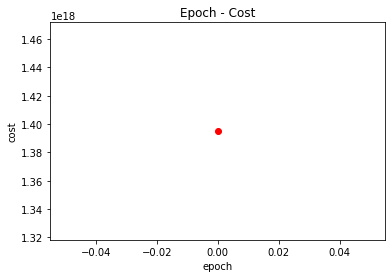

toplam maliyet şu an bu :  1.3460066116121462e+18
1. Maliyetim =  1.3460066116121462e+18
toplam maliyet şu an bu :  1.317749932991767e+18
2. Maliyetim =  1.317749932991767e+18
toplam maliyet şu an bu :  1.3014019805542784e+18
3. Maliyetim =  1.3014019805542784e+18
toplam maliyet şu an bu :  1.291858695078235e+18
4. Maliyetim =  1.291858695078235e+18
toplam maliyet şu an bu :  1.2862011303240033e+18
5. Maliyetim =  1.2862011303240033e+18
toplam maliyet şu an bu :  1.282760712291363e+18
6. Maliyetim =  1.282760712291363e+18
toplam maliyet şu an bu :  1.2805841776612977e+18
7. Maliyetim =  1.2805841776612977e+18
toplam maliyet şu an bu :  1.2791273399858824e+18
8. Maliyetim =  1.2791273399858824e+18
toplam maliyet şu an bu :  1.27807985534079e+18
9. Maliyetim =  1.27807985534079e+18
toplam maliyet şu an bu :  1.2772649743743383e+18
10. Maliyetim =  1.2772649743743383e+18
toplam maliyet şu an bu :  1.276582211656845e+18
11. Maliyetim =  1.276582211656845e+18
toplam maliyet şu an bu :  1.27

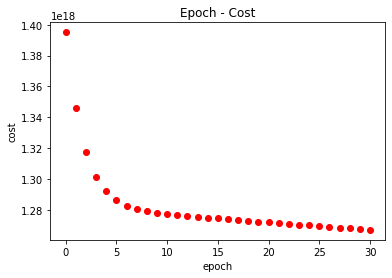

toplam maliyet şu an bu :  1.266464420785536e+18
31. Maliyetim =  1.266464420785536e+18
toplam maliyet şu an bu :  1.2659930389486735e+18
32. Maliyetim =  1.2659930389486735e+18
toplam maliyet şu an bu :  1.2655240114318103e+18
33. Maliyetim =  1.2655240114318103e+18
toplam maliyet şu an bu :  1.2650573242297367e+18
34. Maliyetim =  1.2650573242297367e+18
toplam maliyet şu an bu :  1.2645929624849946e+18
35. Maliyetim =  1.2645929624849946e+18
toplam maliyet şu an bu :  1.2641309107187735e+18
36. Maliyetim =  1.2641309107187735e+18
toplam maliyet şu an bu :  1.263671153013773e+18
37. Maliyetim =  1.263671153013773e+18
toplam maliyet şu an bu :  1.2632136731569395e+18
38. Maliyetim =  1.2632136731569395e+18
toplam maliyet şu an bu :  1.262758454749735e+18
39. Maliyetim =  1.262758454749735e+18
toplam maliyet şu an bu :  1.2623054812924603e+18
40. Maliyetim =  1.2623054812924603e+18
toplam maliyet şu an bu :  1.2618547362484872e+18
41. Maliyetim =  1.2618547362484872e+18
toplam maliyet ş

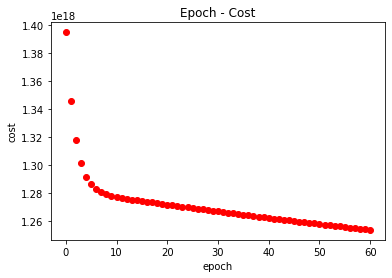

toplam maliyet şu an bu :  1.2532830917643963e+18
61. Maliyetim =  1.2532830917643963e+18
toplam maliyet şu an bu :  1.2528754933465743e+18
62. Maliyetim =  1.2528754933465743e+18
toplam maliyet şu an bu :  1.2524697868993684e+18
63. Maliyetim =  1.2524697868993684e+18
toplam maliyet şu an bu :  1.2520659586808353e+18
64. Maliyetim =  1.2520659586808353e+18
toplam maliyet şu an bu :  1.2516639950786007e+18
65. Maliyetim =  1.2516639950786007e+18
toplam maliyet şu an bu :  1.2512638826084416e+18
66. Maliyetim =  1.2512638826084416e+18
toplam maliyet şu an bu :  1.2508656079128522e+18
67. Maliyetim =  1.2508656079128522e+18
toplam maliyet şu an bu :  1.2504691577596572e+18
68. Maliyetim =  1.2504691577596572e+18
toplam maliyet şu an bu :  1.2500745190406185e+18
69. Maliyetim =  1.2500745190406185e+18
toplam maliyet şu an bu :  1.2496816787700332e+18
70. Maliyetim =  1.2496816787700332e+18
toplam maliyet şu an bu :  1.2492906240833828e+18
71. Maliyetim =  1.2492906240833828e+18
toplam mal

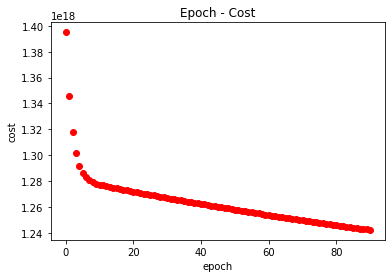

toplam maliyet şu an bu :  1.241825709175351e+18
91. Maliyetim =  1.241825709175351e+18
toplam maliyet şu an bu :  1.2414693809212803e+18
92. Maliyetim =  1.2414693809212803e+18
toplam maliyet şu an bu :  1.2411145833128448e+18
93. Maliyetim =  1.2411145833128448e+18
toplam maliyet şu an bu :  1.2407613059299658e+18
94. Maliyetim =  1.2407613059299658e+18
toplam maliyet şu an bu :  1.2404095384454085e+18
95. Maliyetim =  1.2404095384454085e+18
toplam maliyet şu an bu :  1.2400592706238213e+18
96. Maliyetim =  1.2400592706238213e+18
toplam maliyet şu an bu :  1.2397104923206912e+18
97. Maliyetim =  1.2397104923206912e+18
toplam maliyet şu an bu :  1.2393631934814356e+18
98. Maliyetim =  1.2393631934814356e+18
toplam maliyet şu an bu :  1.2390173641403625e+18
99. Maliyetim =  1.2390173641403625e+18
toplam maliyet şu an bu :  1.2386729944197893e+18
100. Maliyetim =  1.2386729944197893e+18
toplam maliyet şu an bu :  1.238330074529034e+18
101. Maliyetim =  1.238330074529034e+18
toplam maliy

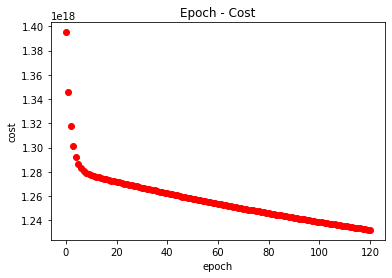

toplam maliyet şu an bu :  1.2317617959753838e+18
121. Maliyetim =  1.2317617959753838e+18
toplam maliyet şu an bu :  1.2314472055854418e+18
122. Maliyetim =  1.2314472055854418e+18
toplam maliyet şu an bu :  1.2311338698831926e+18
123. Maliyetim =  1.2311338698831926e+18
toplam maliyet şu an bu :  1.2308217808447357e+18
124. Maliyetim =  1.2308217808447357e+18
toplam maliyet şu an bu :  1.2305109305137897e+18
125. Maliyetim =  1.2305109305137897e+18
toplam maliyet şu an bu :  1.2302013110009623e+18
126. Maliyetim =  1.2302013110009623e+18
toplam maliyet şu an bu :  1.2298929144830828e+18
127. Maliyetim =  1.2298929144830828e+18
toplam maliyet şu an bu :  1.2295857332025288e+18
128. Maliyetim =  1.2295857332025288e+18
toplam maliyet şu an bu :  1.2292797594665444e+18
129. Maliyetim =  1.2292797594665444e+18
toplam maliyet şu an bu :  1.2289749856466004e+18
130. Maliyetim =  1.2289749856466004e+18
toplam maliyet şu an bu :  1.2286714041777167e+18
131. Maliyetim =  1.2286714041777167e+18

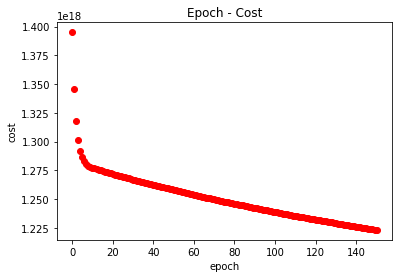

toplam maliyet şu an bu :  1.2228390549151409e+18
151. Maliyetim =  1.2228390549151409e+18
toplam maliyet şu an bu :  1.222558871342803e+18
152. Maliyetim =  1.222558871342803e+18
toplam maliyet şu an bu :  1.2222797285461076e+18
153. Maliyetim =  1.2222797285461076e+18
toplam maliyet şu an bu :  1.22200162025858e+18
154. Maliyetim =  1.22200162025858e+18
toplam maliyet şu an bu :  1.2217245402637716e+18
155. Maliyetim =  1.2217245402637716e+18
toplam maliyet şu an bu :  1.2214484823947372e+18
156. Maliyetim =  1.2214484823947372e+18
toplam maliyet şu an bu :  1.2211734405336003e+18
157. Maliyetim =  1.2211734405336003e+18
toplam maliyet şu an bu :  1.2208994086110282e+18
158. Maliyetim =  1.2208994086110282e+18
toplam maliyet şu an bu :  1.2206263806058117e+18
159. Maliyetim =  1.2206263806058117e+18
toplam maliyet şu an bu :  1.2203543505443466e+18
160. Maliyetim =  1.2203543505443466e+18
toplam maliyet şu an bu :  1.2200833125002348e+18
161. Maliyetim =  1.2200833125002348e+18
topla

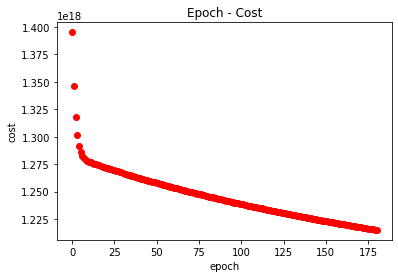

toplam maliyet şu an bu :  1.2148621476671631e+18
181. Maliyetim =  1.2148621476671631e+18
toplam maliyet şu an bu :  1.21461065191285e+18
182. Maliyetim =  1.21461065191285e+18
toplam maliyet şu an bu :  1.2143600288621115e+18
183. Maliyetim =  1.2143600288621115e+18
toplam maliyet şu an bu :  1.2141102735578703e+18
184. Maliyetim =  1.2141102735578703e+18
toplam maliyet şu an bu :  1.213861381080619e+18
185. Maliyetim =  1.213861381080619e+18
toplam maliyet şu an bu :  1.2136133465480323e+18
186. Maliyetim =  1.2136133465480323e+18
toplam maliyet şu an bu :  1.2133661651147092e+18
187. Maliyetim =  1.2133661651147092e+18
toplam maliyet şu an bu :  1.2131198319717332e+18
188. Maliyetim =  1.2131198319717332e+18
toplam maliyet şu an bu :  1.2128743423463982e+18
189. Maliyetim =  1.2128743423463982e+18
toplam maliyet şu an bu :  1.2126296915018747e+18
190. Maliyetim =  1.2126296915018747e+18
toplam maliyet şu an bu :  1.212385874736841e+18
191. Maliyetim =  1.212385874736841e+18
toplam 

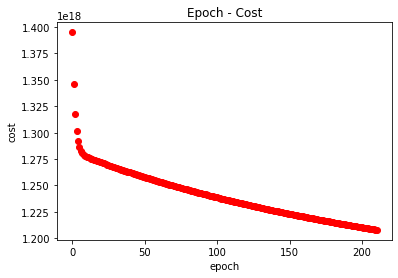

toplam maliyet şu an bu :  1.2076777573690624e+18
211. Maliyetim =  1.2076777573690624e+18
toplam maliyet şu an bu :  1.2074504298819625e+18
212. Maliyetim =  1.2074504298819625e+18
toplam maliyet şu an bu :  1.2072238414116544e+18
213. Maliyetim =  1.2072238414116544e+18
toplam maliyet şu an bu :  1.2069979879908436e+18
214. Maliyetim =  1.2069979879908436e+18
toplam maliyet şu an bu :  1.206772865680852e+18
215. Maliyetim =  1.206772865680852e+18
toplam maliyet şu an bu :  1.2065484705713618e+18
216. Maliyetim =  1.2065484705713618e+18
toplam maliyet şu an bu :  1.206324798780133e+18
217. Maliyetim =  1.206324798780133e+18
toplam maliyet şu an bu :  1.2061018464527951e+18
218. Maliyetim =  1.2061018464527951e+18
toplam maliyet şu an bu :  1.2058796097625882e+18
219. Maliyetim =  1.2058796097625882e+18
toplam maliyet şu an bu :  1.2056580849101087e+18
220. Maliyetim =  1.2056580849101087e+18
toplam maliyet şu an bu :  1.2054372681230912e+18
221. Maliyetim =  1.2054372681230912e+18
top

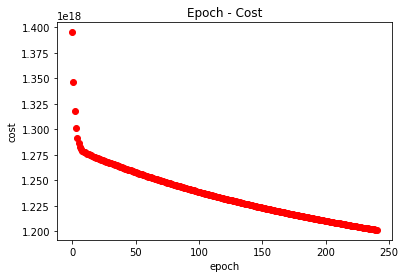

toplam maliyet şu an bu :  1.2011640472806326e+18
241. Maliyetim =  1.2011640472806326e+18
toplam maliyet şu an bu :  1.2009572740956664e+18
242. Maliyetim =  1.2009572740956664e+18
toplam maliyet şu an bu :  1.2007511323941018e+18
243. Maliyetim =  1.2007511323941018e+18
toplam maliyet şu an bu :  1.2005456189667523e+18
244. Maliyetim =  1.2005456189667523e+18
toplam maliyet şu an bu :  1.2003407306265403e+18
245. Maliyetim =  1.2003407306265403e+18
toplam maliyet şu an bu :  1.2001364642082112e+18
246. Maliyetim =  1.2001364642082112e+18
toplam maliyet şu an bu :  1.199932816568217e+18
247. Maliyetim =  1.199932816568217e+18
toplam maliyet şu an bu :  1.199729784584494e+18
248. Maliyetim =  1.199729784584494e+18
toplam maliyet şu an bu :  1.1995273651563105e+18
249. Maliyetim =  1.1995273651563105e+18
toplam maliyet şu an bu :  1.1993255552040804e+18
250. Maliyetim =  1.1993255552040804e+18
toplam maliyet şu an bu :  1.19912435166917e+18
251. Maliyetim =  1.19912435166917e+18
toplam 

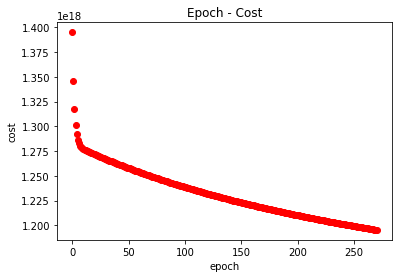

toplam maliyet şu an bu :  1.1952230967419878e+18
271. Maliyetim =  1.1952230967419878e+18
toplam maliyet şu an bu :  1.1950339567650442e+18
272. Maliyetim =  1.1950339567650442e+18
toplam maliyet şu an bu :  1.1948453608825137e+18
273. Maliyetim =  1.1948453608825137e+18
toplam maliyet şu an bu :  1.1946573064728799e+18
274. Maliyetim =  1.1946573064728799e+18
toplam maliyet şu an bu :  1.194469790931831e+18
275. Maliyetim =  1.194469790931831e+18
toplam maliyet şu an bu :  1.194282811672088e+18
276. Maliyetim =  1.194282811672088e+18
toplam maliyet şu an bu :  1.1940963661233183e+18
277. Maliyetim =  1.1940963661233183e+18
toplam maliyet şu an bu :  1.1939104517319626e+18
278. Maliyetim =  1.1939104517319626e+18
toplam maliyet şu an bu :  1.193725065961105e+18
279. Maliyetim =  1.193725065961105e+18
toplam maliyet şu an bu :  1.193540206290357e+18
280. Maliyetim =  1.193540206290357e+18
toplam maliyet şu an bu :  1.1933558702157105e+18
281. Maliyetim =  1.1933558702157105e+18
toplam 

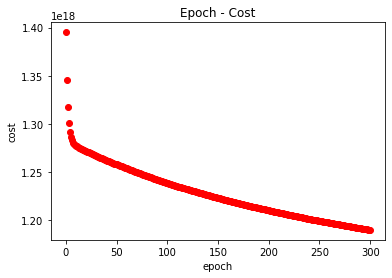

toplam maliyet şu an bu :  1.1897753873811466e+18
301. Maliyetim =  1.1897753873811466e+18
toplam maliyet şu an bu :  1.1896014960685222e+18
302. Maliyetim =  1.1896014960685222e+18
toplam maliyet şu an bu :  1.1894280771556186e+18
303. Maliyetim =  1.1894280771556186e+18
toplam maliyet şu an bu :  1.189255128481352e+18
304. Maliyetim =  1.189255128481352e+18
toplam maliyet şu an bu :  1.189082647898239e+18
305. Maliyetim =  1.189082647898239e+18
toplam maliyet şu an bu :  1.188910633272203e+18
306. Maliyetim =  1.188910633272203e+18
toplam maliyet şu an bu :  1.188739082482501e+18
307. Maliyetim =  1.188739082482501e+18
toplam maliyet şu an bu :  1.1885679934216763e+18
308. Maliyetim =  1.1885679934216763e+18
toplam maliyet şu an bu :  1.1883973639953336e+18
309. Maliyetim =  1.1883973639953336e+18
toplam maliyet şu an bu :  1.188227192122174e+18
310. Maliyetim =  1.188227192122174e+18
toplam maliyet şu an bu :  1.1880574757337964e+18
311. Maliyetim =  1.1880574757337964e+18
toplam ma

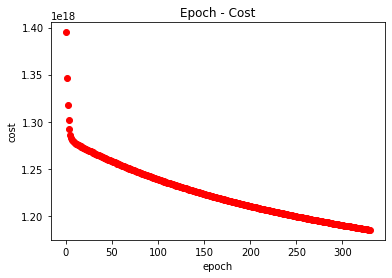

toplam maliyet şu an bu :  1.1847557248575724e+18
331. Maliyetim =  1.1847557248575724e+18
toplam maliyet şu an bu :  1.1845951177351557e+18
332. Maliyetim =  1.1845951177351557e+18
toplam maliyet şu an bu :  1.1844349236727375e+18
333. Maliyetim =  1.1844349236727375e+18
toplam maliyet şu an bu :  1.1842751408736556e+18
334. Maliyetim =  1.1842751408736556e+18
toplam maliyet şu an bu :  1.1841157675520026e+18
335. Maliyetim =  1.1841157675520026e+18
toplam maliyet şu an bu :  1.1839568019326e+18
336. Maliyetim =  1.1839568019326e+18
toplam maliyet şu an bu :  1.1837982422508613e+18
337. Maliyetim =  1.1837982422508613e+18
toplam maliyet şu an bu :  1.1836400867527452e+18
338. Maliyetim =  1.1836400867527452e+18
toplam maliyet şu an bu :  1.1834823336946604e+18
339. Maliyetim =  1.1834823336946604e+18
toplam maliyet şu an bu :  1.1833249813434053e+18
340. Maliyetim =  1.1833249813434053e+18
toplam maliyet şu an bu :  1.1831680279760863e+18
341. Maliyetim =  1.1831680279760863e+18
topla

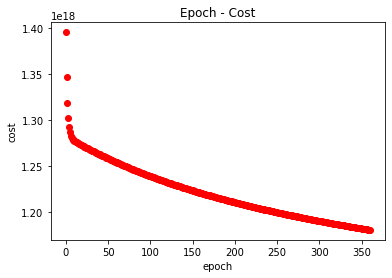

toplam maliyet şu an bu :  1.1801101820843453e+18
361. Maliyetim =  1.1801101820843453e+18
toplam maliyet şu an bu :  1.1799612268565965e+18
362. Maliyetim =  1.1799612268565965e+18
toplam maliyet şu an bu :  1.1798126351685565e+18
363. Maliyetim =  1.1798126351685565e+18
toplam maliyet şu an bu :  1.1796644055145695e+18
364. Maliyetim =  1.1796644055145695e+18
toplam maliyet şu an bu :  1.1795165363976256e+18
365. Maliyetim =  1.1795165363976256e+18
toplam maliyet şu an bu :  1.1793690263293066e+18
366. Maliyetim =  1.1793690263293066e+18
toplam maliyet şu an bu :  1.1792218738296983e+18
367. Maliyetim =  1.1792218738296983e+18
toplam maliyet şu an bu :  1.1790750774273623e+18
368. Maliyetim =  1.1790750774273623e+18
toplam maliyet şu an bu :  1.1789286356592666e+18
369. Maliyetim =  1.1789286356592666e+18
toplam maliyet şu an bu :  1.178782547070701e+18
370. Maliyetim =  1.178782547070701e+18
toplam maliyet şu an bu :  1.1786368102152602e+18
371. Maliyetim =  1.1786368102152602e+18
t

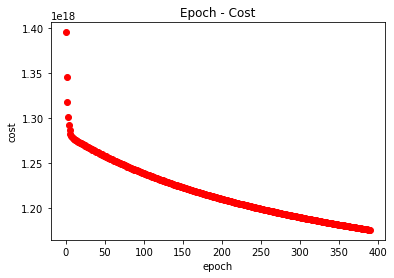

toplam maliyet şu an bu :  1.1757937804702756e+18
391. Maliyetim =  1.1757937804702756e+18
toplam maliyet şu an bu :  1.1756551099484928e+18
392. Maliyetim =  1.1756551099484928e+18
toplam maliyet şu an bu :  1.175516761319633e+18
393. Maliyetim =  1.175516761319633e+18
toplam maliyet şu an bu :  1.1753787333124252e+18
394. Maliyetim =  1.1753787333124252e+18
toplam maliyet şu an bu :  1.1752410246626268e+18
395. Maliyetim =  1.1752410246626268e+18
toplam maliyet şu an bu :  1.1751036341129152e+18
396. Maliyetim =  1.1751036341129152e+18
toplam maliyet şu an bu :  1.1749665604128579e+18
397. Maliyetim =  1.1749665604128579e+18
toplam maliyet şu an bu :  1.174829802318896e+18
398. Maliyetim =  1.174829802318896e+18
toplam maliyet şu an bu :  1.1746933585942648e+18
399. Maliyetim =  1.1746933585942648e+18
toplam maliyet şu an bu :  1.1745572280089477e+18
400. Maliyetim =  1.1745572280089477e+18
toplam maliyet şu an bu :  1.174421409339649e+18
401. Maliyetim =  1.174421409339649e+18
topla

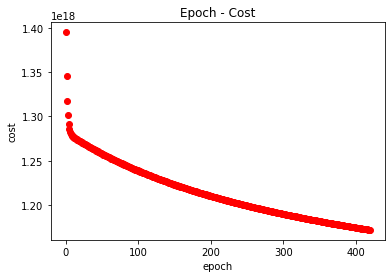

toplam maliyet şu an bu :  1.1717687119500096e+18
421. Maliyetim =  1.1717687119500096e+18
toplam maliyet şu an bu :  1.1716391723454262e+18
422. Maliyetim =  1.1716391723454262e+18
toplam maliyet şu an bu :  1.1715099193526787e+18
423. Maliyetim =  1.1715099193526787e+18
toplam maliyet şu an bu :  1.1713809518908303e+18
424. Maliyetim =  1.1713809518908303e+18
toplam maliyet şu an bu :  1.1712522688846418e+18
425. Maliyetim =  1.1712522688846418e+18
toplam maliyet şu an bu :  1.171123869264535e+18
426. Maliyetim =  1.171123869264535e+18
toplam maliyet şu an bu :  1.1709957519665577e+18
427. Maliyetim =  1.1709957519665577e+18
toplam maliyet şu an bu :  1.1708679159323666e+18
428. Maliyetim =  1.1708679159323666e+18
toplam maliyet şu an bu :  1.1707403601091446e+18
429. Maliyetim =  1.1707403601091446e+18
toplam maliyet şu an bu :  1.1706130834495987e+18
430. Maliyetim =  1.1706130834495987e+18
toplam maliyet şu an bu :  1.1704860849119278e+18
431. Maliyetim =  1.1704860849119278e+18
t

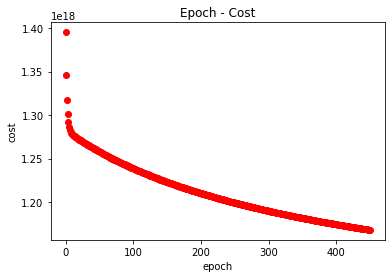

toplam maliyet şu an bu :  1.1680029623781588e+18
451. Maliyetim =  1.1680029623781588e+18
toplam maliyet şu an bu :  1.1678815730719813e+18
452. Maliyetim =  1.1678815730719813e+18
toplam maliyet şu an bu :  1.1677604402836892e+18
453. Maliyetim =  1.1677604402836892e+18
toplam maliyet şu an bu :  1.1676395630880568e+18
454. Maliyetim =  1.1676395630880568e+18
toplam maliyet şu an bu :  1.16751894056453e+18
455. Maliyetim =  1.16751894056453e+18
toplam maliyet şu an bu :  1.1673985717972193e+18
456. Maliyetim =  1.1673985717972193e+18
toplam maliyet şu an bu :  1.1672784558748493e+18
457. Maliyetim =  1.1672784558748493e+18
toplam maliyet şu an bu :  1.167158591890743e+18
458. Maliyetim =  1.167158591890743e+18
toplam maliyet şu an bu :  1.1670389789427932e+18
459. Maliyetim =  1.1670389789427932e+18
toplam maliyet şu an bu :  1.1669196161334103e+18
460. Maliyetim =  1.1669196161334103e+18
toplam maliyet şu an bu :  1.1668005025695383e+18
461. Maliyetim =  1.1668005025695383e+18
topla

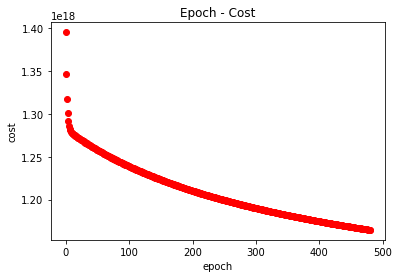

toplam maliyet şu an bu :  1.1644692362405307e+18
481. Maliyetim =  1.1644692362405307e+18
toplam maliyet şu an bu :  1.164355158219322e+18
482. Maliyetim =  1.164355158219322e+18
toplam maliyet şu an bu :  1.1642413108805192e+18
483. Maliyetim =  1.1642413108805192e+18
toplam maliyet şu an bu :  1.1641276934272284e+18
484. Maliyetim =  1.1641276934272284e+18
toplam maliyet şu an bu :  1.1640143050664108e+18
485. Maliyetim =  1.1640143050664108e+18
toplam maliyet şu an bu :  1.1639011450088886e+18
486. Maliyetim =  1.1639011450088886e+18
toplam maliyet şu an bu :  1.1637882124693038e+18
487. Maliyetim =  1.1637882124693038e+18
toplam maliyet şu an bu :  1.1636755066661117e+18
488. Maliyetim =  1.1636755066661117e+18
toplam maliyet şu an bu :  1.16356302682154e+18
489. Maliyetim =  1.16356302682154e+18
toplam maliyet şu an bu :  1.163450772161578e+18
490. Maliyetim =  1.163450772161578e+18
toplam maliyet şu an bu :  1.1633387419159265e+18
491. Maliyetim =  1.1633387419159265e+18
toplam 

In [ ]:
import copy

cost_all = []

def Gd_with_all(X , Y , Q_all:list, alfa=0.1, epoch= 100 ):
    
    satir_sayisi = len(X)
    kolon_sayisi = X.shape[1]
    

    for i in range(epoch):

        temp_cost = J_2(X=x_test, Y=y_test.values, Q_all=Q_all)
        cost_all.append(temp_cost) 

        for j in range(kolon_sayisi+1):
            q_temp[j] = Q_all[j] - alfa * J_derivate_2(X=X, Y=Y, Q_all=Q_all, k=j)   
        print(f"{i}. Maliyetim = ",temp_cost )

        Q_all = copy.deepcopy(q_temp)

        if i % 50 == 0:
            plt.scatter(x = range(len(cost_all)) ,y = cost_all , color="red")       
            # tanım
            plt.xlabel("epoch")
            plt.ylabel("cost")
            plt.title("Epoch - Cost")
            plt.show()    
    

    print(Q_all)
    
    """

    Q[0] , Q[1] , Q[2] = q0,q1,q2

    if i % 30 == 0:
        print(f"Maliyet[{i}] = ",cost[i] )
        plt.scatter(x = range(len(cost)) ,y = cost, color="green")       
        # tanım
        plt.xlabel("zaman")
        plt.ylabel("cost")
        plt.title("K")
        plt.show()    

    """

Gd_with_all(X=x_train , Y=y_train.values, Q_all=Q_all, alfa=0.08 , epoch=1000)

In [ ]:
hatalar = [] 
def percent_error():
    for i in range(len(x_test)):
        # print(f"Q[0]={Q[0]}  Q[1]={Q[1]}  Q[2]={Q[2]}")
        gercek = y_test.values[i]
        print(f"Gerçek {i}. veri = {gercek}")

        
        tahmin = Hq(X = x_test[i], Q_all = Q_all)
        
        # print("X verileri = ", x_test[i] ) 
        print(f"Tahmin {i}. veri = {tahmin}")

        aradaki_fark = (abs(gercek - tahmin) / gercek) * 100
        # print(f" %{aradaki_fark} hata")

        hatalar.append(aradaki_fark)
    print("Ortalama hatalar oranı %", (sum(hatalar)/len(hatalar)) )

percent_error()

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Tahmin 3984. veri = 1082706.4036364872
Gerçek 3985. veri = [221000.]
Tahmin 3985. veri = 502526.9916042313
Gerçek 3986. veri = [532500.]
Tahmin 3986. veri = 455881.82593442086
Gerçek 3987. veri = [1248000.]
Tahmin 3987. veri = 690689.7466056558
Gerçek 3988. veri = [402000.]
Tahmin 3988. veri = 477376.6392422609
Gerçek 3989. veri = [780000.]
Tahmin 3989. veri = 686609.5485183091
Gerçek 3990. veri = [565000.]
Tahmin 3990. veri = 514015.4043439907
Gerçek 3991. veri = [834000.]
Tahmin 3991. veri = 672801.6840290851
Gerçek 3992. veri = [595000.]
Tahmin 3992. veri = 689647.3092786964
Gerçek 3993. veri = [171800.]
Tahmin 3993. veri = 464044.6570538192
Gerçek 3994. veri = [550000.]
Tahmin 3994. veri = 485610.6402166134
Gerçek 3995. veri = [384000.]
Tahmin 3995. veri = 460045.9006484096
Gerçek 3996. veri = [299000.]
Tahmin 3996. veri = 487167.4706685146
Gerçek 3997. veri = [282900.]
Tahmin 3997. veri = 457867.5787059573
Gerçek 3998. veri = [587000.